In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
folder_path = "C:\\workspace\\Kaggle\\Airbus\\train\\"

In [4]:
# filename = "0a3b48a9c.jpg"
# filename = "0a1a7f395.jpg"
filename = "0a286fb15.jpg"

In [5]:
img_path = folder_path + filename

In [6]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

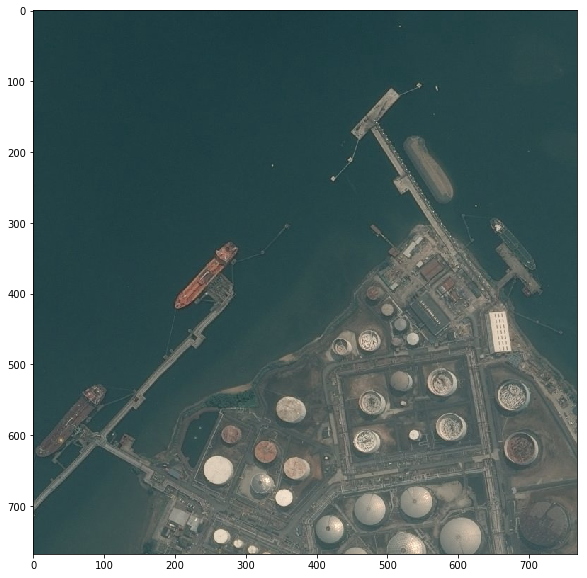

In [7]:
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

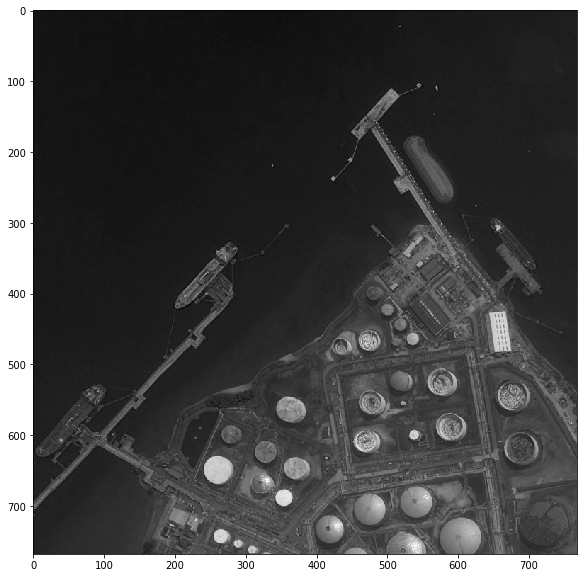

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(gray, cmap="gray")
plt.show()

### Apply sober

In [10]:
# if orient == "x"
abs_sobel_x = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
# if orient == "y"
abs_sobel_y = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))

In [11]:
# Rescale back to 8 bit integer
scaled_sobel_x = np.uint8(255*abs_sobel_x/np.max(abs_sobel_x))
scaled_sobel_y = np.uint8(255*abs_sobel_y/np.max(abs_sobel_y))

In [12]:
# Create a copy and apply the threshold
binary_output_x = np.zeros_like(scaled_sobel_x)
binary_output_y = np.zeros_like(scaled_sobel_y)

In [13]:
thresh_min = 120
thresh_max = 255

In [14]:
# Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
binary_output_x[(scaled_sobel_x >= thresh_min) & (scaled_sobel_x <= thresh_max)] = 1
binary_output_y[(scaled_sobel_y >= thresh_min) & (scaled_sobel_y <= thresh_max)] = 1

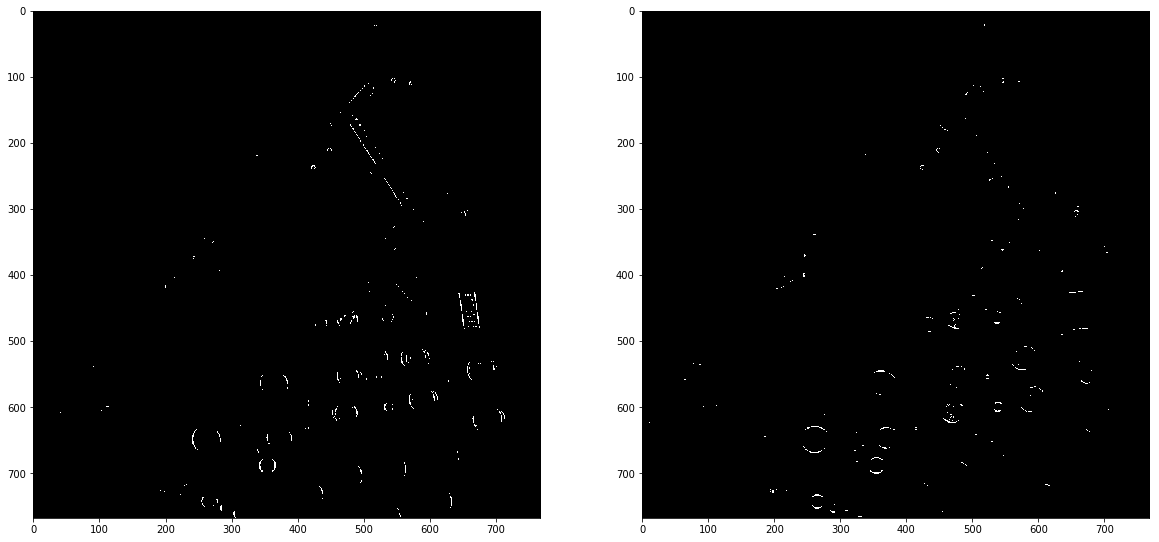

In [15]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.imshow(binary_output_x, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(binary_output_y, cmap="gray")

plt.show()

In [16]:
blank = np.zeros_like(binary_output_x) #Create a blank image with the same dimension 
blank[((binary_output_x == 1)) | ((binary_output_y == 1))] = 1 #Combine two masks

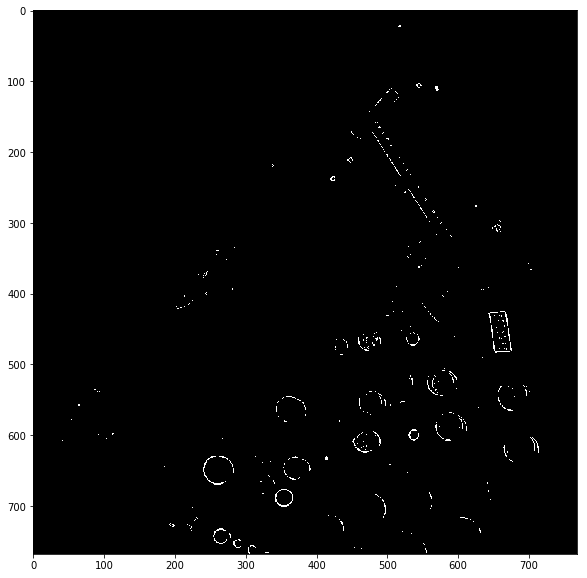

In [17]:
plt.figure(figsize=(15,10))
plt.imshow(blank, cmap = "gray")
plt.show()